In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Import datasets

In [2]:
green = pd.read_csv('data/green.csv')

In [4]:
yellow = pd.read_csv('data/yellow.csv')

In [6]:
fhv = pd.read_csv('data/fhv.csv')

In [110]:
print('green.csv  has  {} observations\nyellow.csv has {} observations\nfhv.csv    has {} observations'.format(green.shape[0],yellow.shape[0],fhv.shape[0]))

green.csv  has  561667 observations
yellow.csv has 4935793 observations
fhv.csv    has 6501995 observations


### Modify dateset ```green```

* Converting pickup and dropoff time to datetime format 

* Generating new columns pickup/dropoff date, year, month, day, day of week and hour

In [24]:
green['pickup_time'] = pd.to_datetime(green['pickup_time'])

In [25]:
green['dropoff_time'] = pd.to_datetime(green['dropoff_time'])

In [26]:
green['pickup_date'] = green.pickup_time.apply(lambda x: x.date())

In [10]:
green['pickup_year'] = green.pickup_time.apply(lambda x: x.year)

In [11]:
green['pickup_month'] = green.pickup_time.apply(lambda x: x.month)

In [12]:
green['pickup_day'] = green.pickup_time.apply(lambda x: x.day)

In [13]:
green['pickup_day_of_week'] = green.pickup_time.apply(lambda x: x.weekday()+1) # why do i need to add one day

In [14]:
green['pickup_hour'] = green.pickup_time.apply(lambda x: x.hour)

In [ ]:
green['dropoff_date'] = green.dropoff_time.apply(lambda x: x.date())

In [17]:
green['dropoff_year'] = green.dropoff_time.apply(lambda x: x.year)

In [18]:
green['dropoff_month'] = green.dropoff_time.apply(lambda x: x.month)

In [19]:
green['dropoff_day'] = green.dropoff_time.apply(lambda x: x.day)

In [20]:
green['dropoff_day_of_week'] = green.dropoff_time.apply(lambda x: x.weekday()+1)

In [21]:
green['dropoff_hour'] = green.dropoff_time.apply(lambda x: x.hour)

### Check histogram of pickup time

In [114]:
# green['pickup_time'].hist(bins=48)
# display()

In [28]:
# green.groupby('pickup_year').agg({'pickup_year':'count'})

```green``` has a few observations from year 2008, 2009 and 2010. Delete them.

In [29]:
green = green[(green['pickup_year']!=2008)&(green['pickup_year']!=2009)&(green['pickup_year']!=2010)]

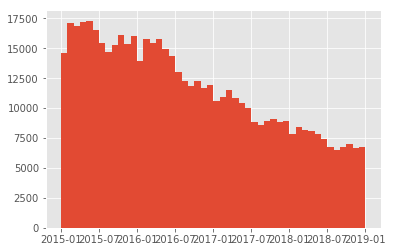

In [30]:
green['pickup_time'].hist(bins=48)
display()

Obviously, the number of pickups by green taxi is decreasing.

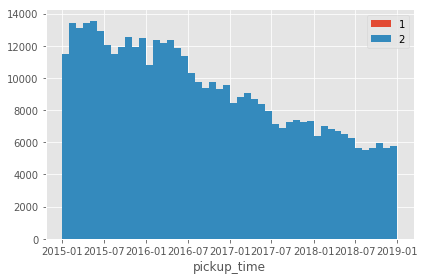

In [123]:
gg = sns.FacetGrid(green,hue = 'vendor_id',height = 4,aspect=1.5)
gg.map(plt.hist,'pickup_time',bins = 48,stacked = False)
plt.legend()

In [115]:
green[green.vendor_id==1].shape[0]/green[green.vendor_id==2].shape[0]

0.2534663717860881

There are two types of vendor_id in the dataset. The number of pickups by verdor_id 1 is about $25\%$ of vendor_id 2. Where is the red color?

### Check histogram of trip distance

In [33]:
green[['trip_distance']].describe()

,trip_distance
count,561667.000000
mean,2.860122
std,3.032148
min,0.000000
25%,1.030000
50%,1.850000
75%,3.550000
max,136.000000


In [58]:
print('1---standard rate \n2---JFK \n3---Newark \n4---Nassau or Westchester \n5---negotiated \n6---round trip \n99--imputed')
green[green.trip_distance==0]['rate_code'].value_counts()

1---standard rate 
2---JFK 
3---Newark 
4---Nassau or Westchester 
5---negotiated 
6---round trip 
99--imputed


1     4293
5     2587
2      296
3       87
99       7
4        4
6        2
Name: rate_code, dtype: int64

#### Histogram of trip distance between 0 and 25

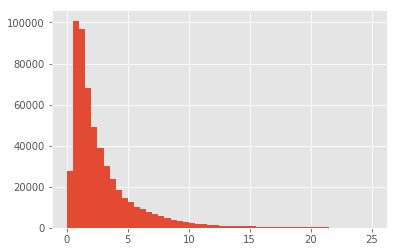

In [34]:
green[(green['trip_distance']<25)&(green['trip_distance']>0)].trip_distance.hist(bins=50)
display()

#### Histogram of trip distance less than 25 by different years

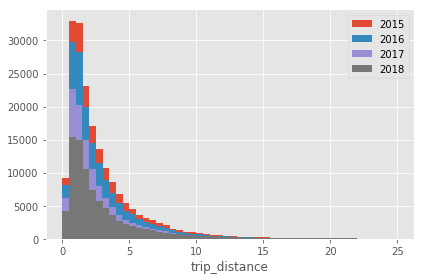

In [122]:
disY=sns.FacetGrid(green[(green['trip_distance']<25)&(green['trip_distance']>0)],hue = 'pickup_year',
                   height=4,aspect=1.5)
disY.map(plt.hist,'trip_distance',bins=50)
plt.legend()

#### Histogram of trip distance less than 25 by different months

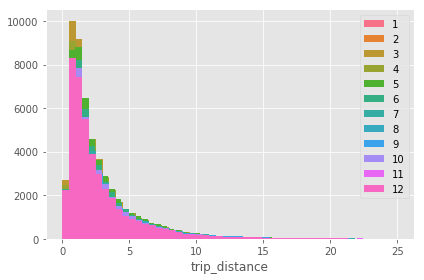

In [121]:
disM=sns.FacetGrid(green[(green['trip_distance']<25)&(green['trip_distance']>0)],hue = 'pickup_month',
                   height=4,aspect=1.5)
disM.map(plt.hist,'trip_distance',bins=50,stacked=True)
plt.legend()

#### Histogram of trip distance less than 25 by different days of a week

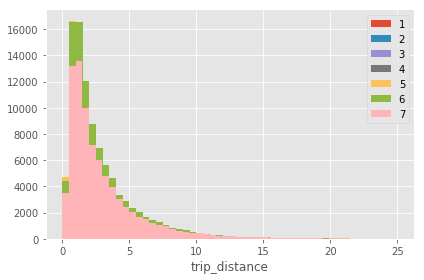

In [120]:
disDW=sns.FacetGrid(green[(green['trip_distance']<25)&(green['trip_distance']>0)],hue = 'pickup_day_of_week',
                    height=4,aspect=1.5)
disDW.map(plt.hist,'trip_distance',bins=50)
plt.legend()

#### Histogram of trip distance greater than 25 

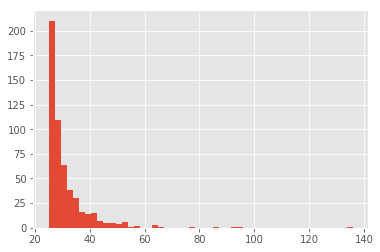

In [38]:
green[green['trip_distance']>=25].trip_distance.hist(bins=50)
display()

#### Histogram of trip distance greater than 25 by different years

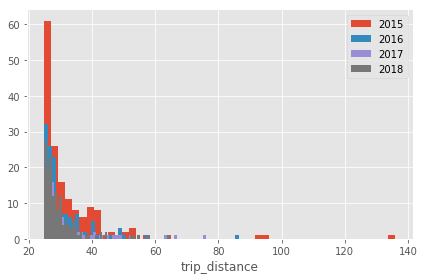

In [119]:
disY2=sns.FacetGrid(green[green['trip_distance']>=25],hue = 'pickup_year',height=4,aspect=1.5)
disY2.map(plt.hist,'trip_distance',bins=50)
plt.legend()

#### Histogram of trip distance greater than 25 by different months

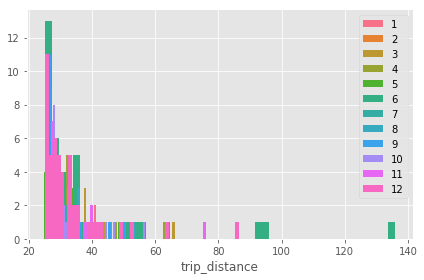

In [118]:
disM2=sns.FacetGrid(green[green['trip_distance']>=25],hue = 'pickup_month',height=4,aspect=1.5)
disM2.map(plt.hist,'trip_distance',bins=50)
plt.legend()

#### Histogram of trip distance greater than 25 by different days of a week

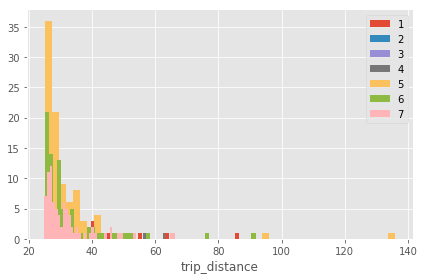

In [117]:
disDW2=sns.FacetGrid(green[green['trip_distance']>=25],hue = 'pickup_day_of_week',height=4,aspect=1.5)
disDW2.map(plt.hist,'trip_distance',bins=50)
plt.legend()

### Check pickup times for each year

#### by month
* Pretty much the same shape, but shrinking by year

In [42]:
bymonth = green.groupby(['pickup_year','pickup_month']).agg({'pickup_time':'count'}).reset_index()
bymonth.columns = ['pickup_year','pickup_month','count']

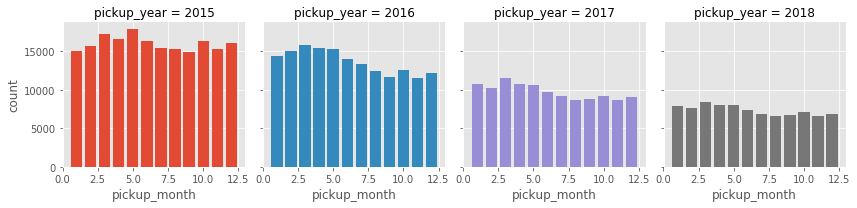

In [43]:
g = sns.FacetGrid(bymonth, col='pickup_year',hue='pickup_year')
g.map(plt.bar,'pickup_month','count')

#### by day

In [44]:
byday = green.groupby(['pickup_year','pickup_day']).agg({'pickup_time':'count'}).reset_index()
byday.columns = ['pickup_year','pickup_day','count']

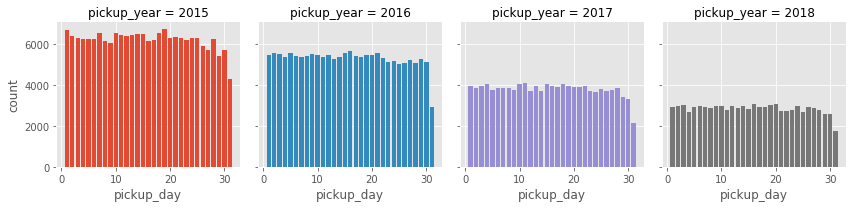

In [45]:
g2 = sns.FacetGrid(byday, col='pickup_year',hue='pickup_year')
g2.map(plt.bar,'pickup_day','count')

#### by day of a week
* more green taxi calls on Friday and Saturday, but decreased by year

In [46]:
byweekday = green.groupby(['pickup_year','pickup_day_of_week']).agg({'pickup_time':'count'}).reset_index()
byweekday.columns = ['pickup_year','pickup_day_of_week','count']

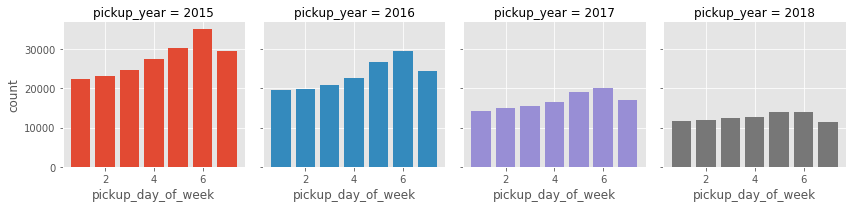

In [47]:
g3 = sns.FacetGrid(byweekday, col='pickup_year',hue='pickup_year')
g3.map(plt.bar,'pickup_day_of_week','count')

#### by hour
* peak at 6:00, 7:00 pm
* least call at 6:00, 7:00 am
* shape varies little by month, and year

In [48]:
byhour = green.groupby(['pickup_year','pickup_month','pickup_hour']).agg({'pickup_time':'count'}).reset_index()
byhour.columns = ['pickup_year','pickup_month','pickup_hour','count']

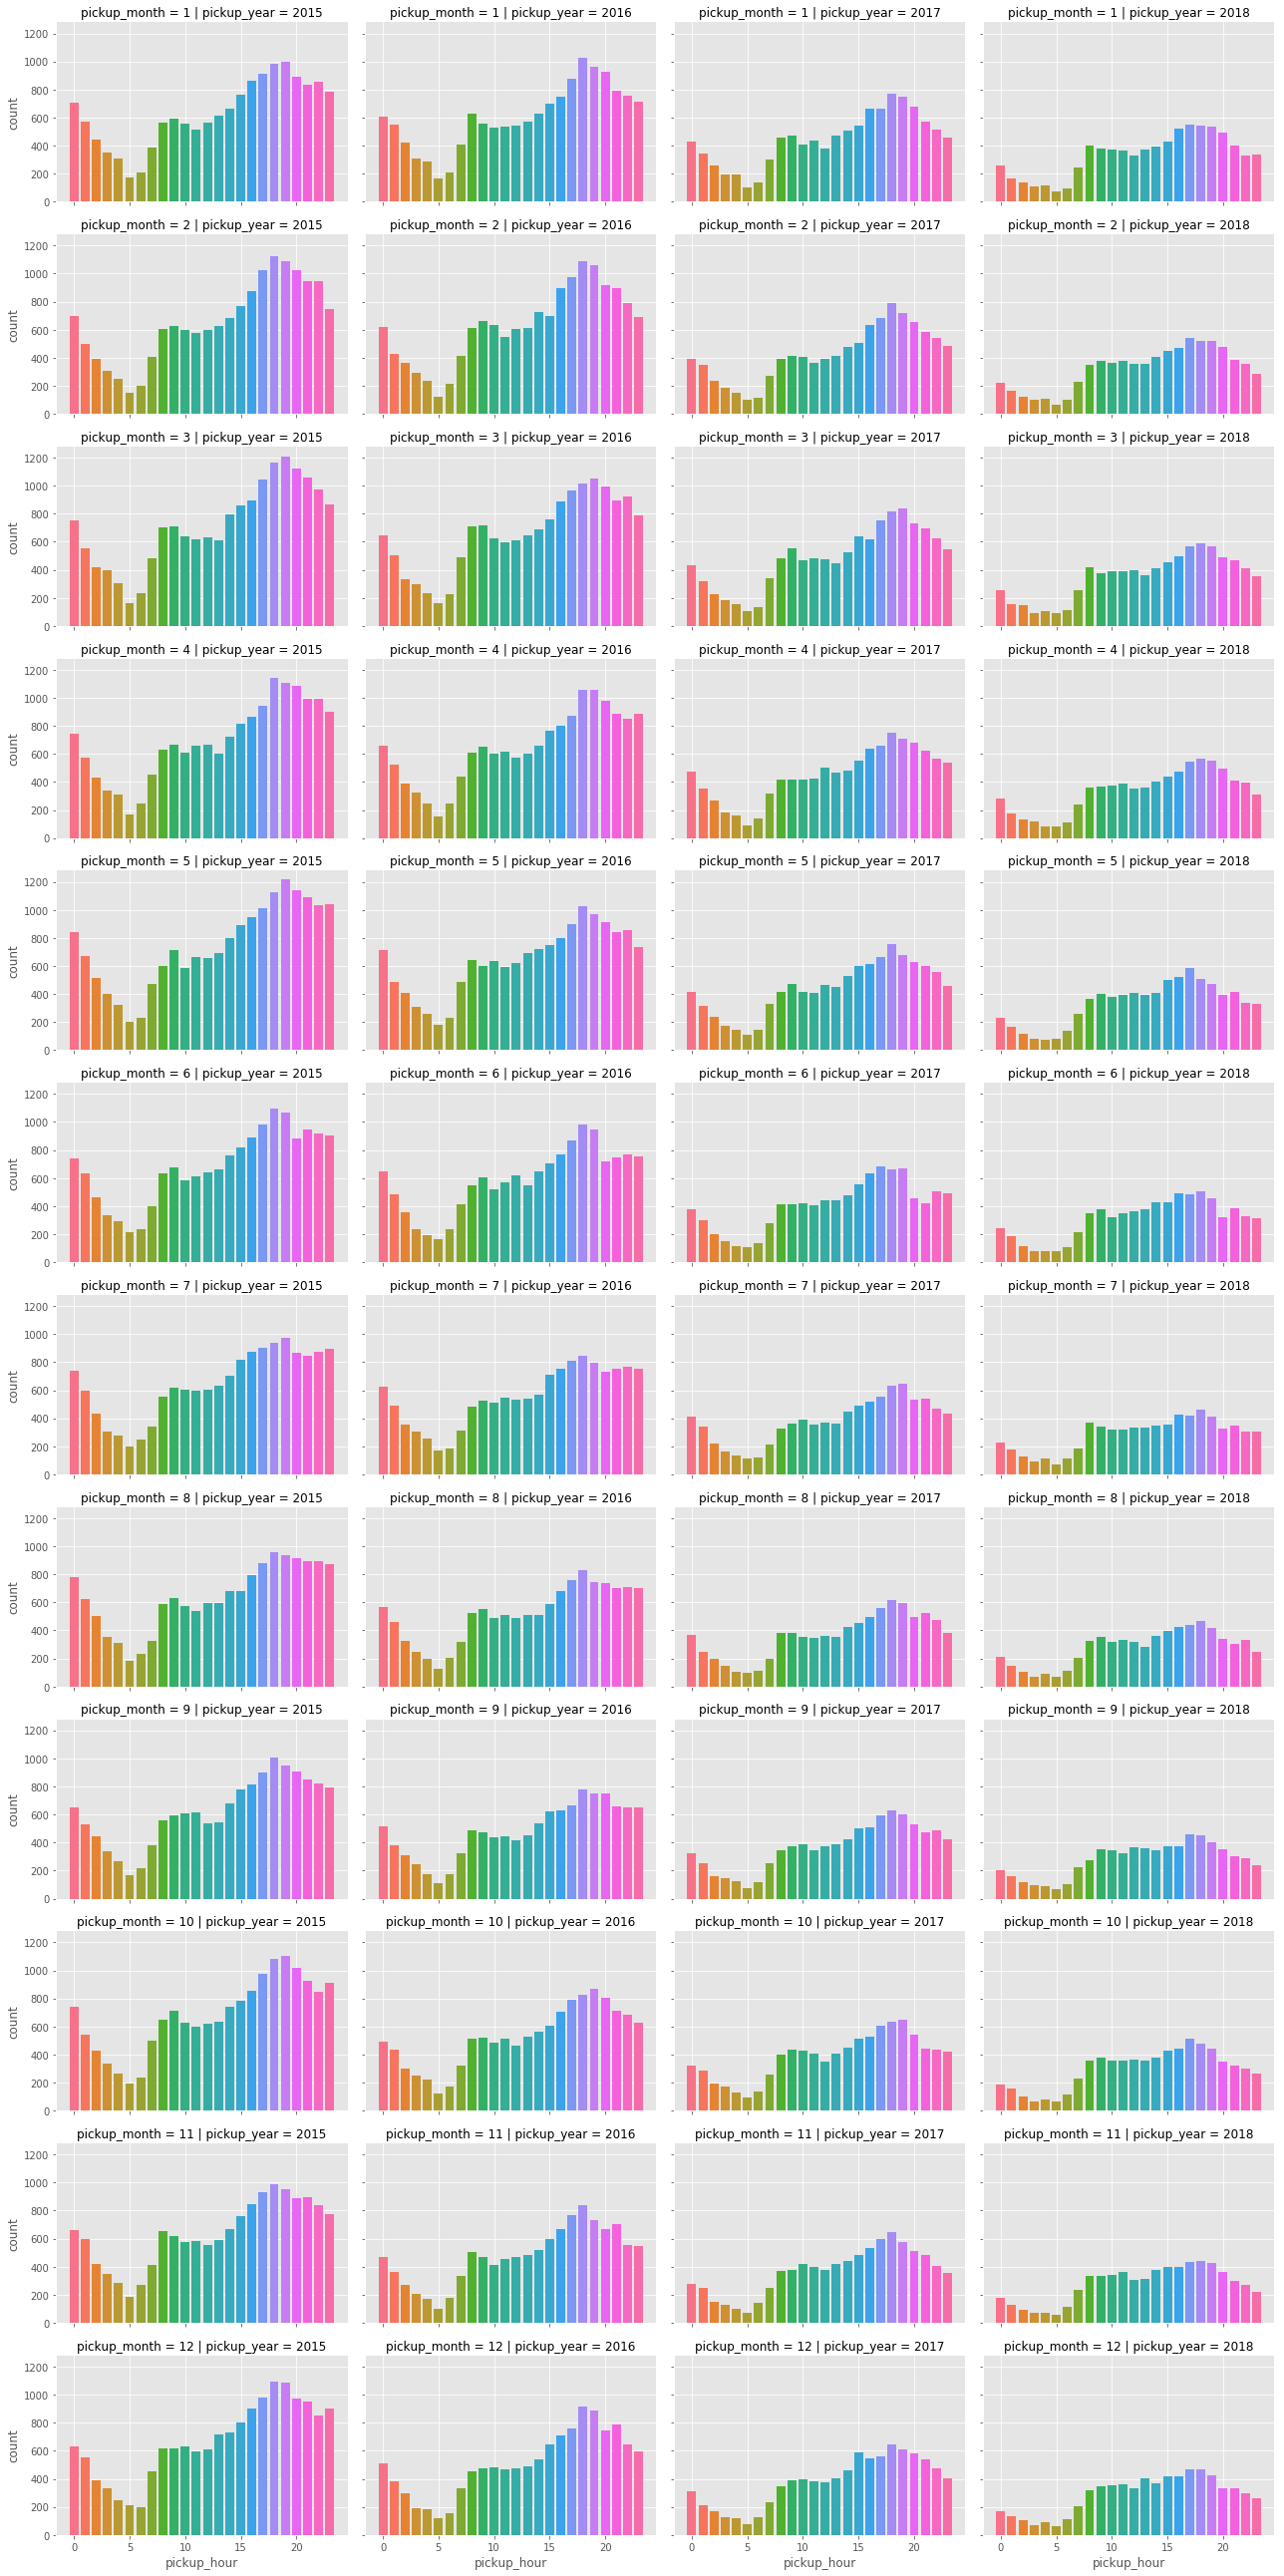

In [49]:
g4 = sns.FacetGrid(byhour, col='pickup_year',row='pickup_month',hue='pickup_hour',aspect=1.5)
g4.map(plt.bar,'pickup_hour','count')

#### by week

In [67]:
green['pickup_week'] = green.pickup_time.apply(lambda x: x.week)

In [68]:
byweek = green.groupby(['pickup_year','pickup_week']).agg({'pickup_time':'count'}).reset_index()

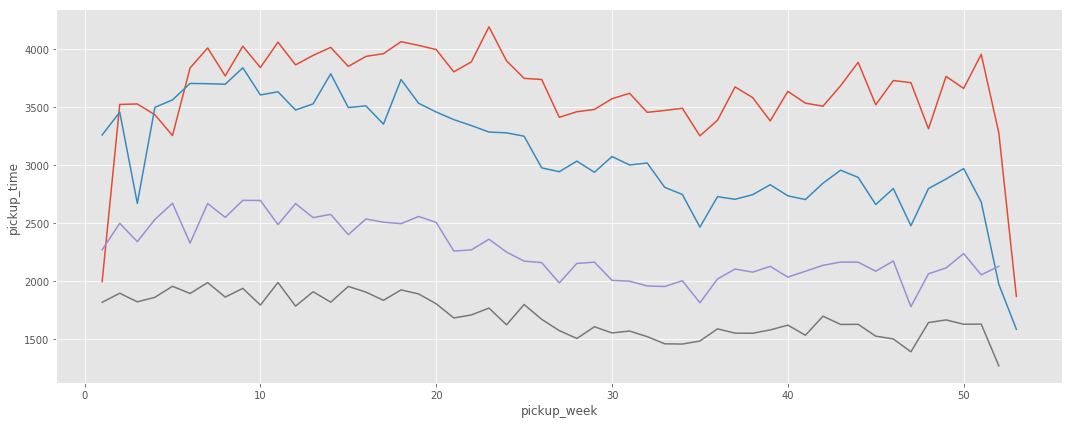

In [129]:
g5 = sns.FacetGrid(byweek, hue='pickup_year',height=6,aspect=2.5)
g5.map(plt.plot,'pickup_week','pickup_time')

#### by day

In [70]:
everyday = green.groupby(['pickup_date']).agg({'pickup_time':'count'}).reset_index()

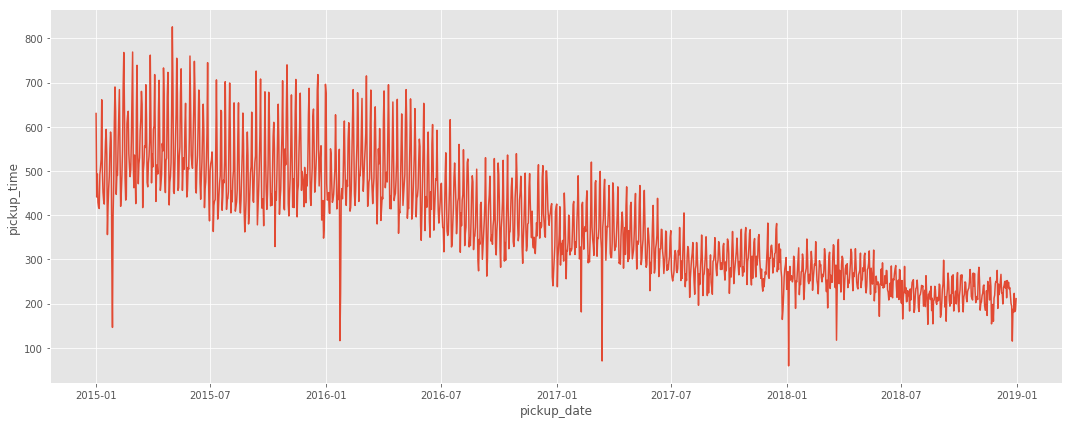

In [130]:
g5 = sns.FacetGrid(everyday,height=6,aspect=2.5)
g5.map(plt.plot,'pickup_date','pickup_time')

### Trip distance vs number of passengers

* 0-passenger observations should be ignored here
* cases less than 10 miles, passenger 1 - 6 have similar patterns
* very long distance(>50 miles) cases are most by 1-passenger

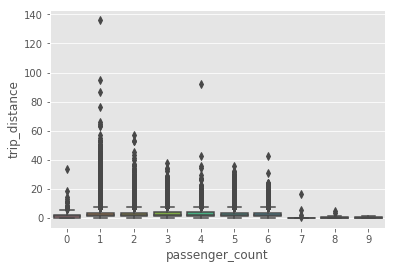

In [52]:
sns.boxplot(x = 'passenger_count', y = 'trip_distance', data = green)

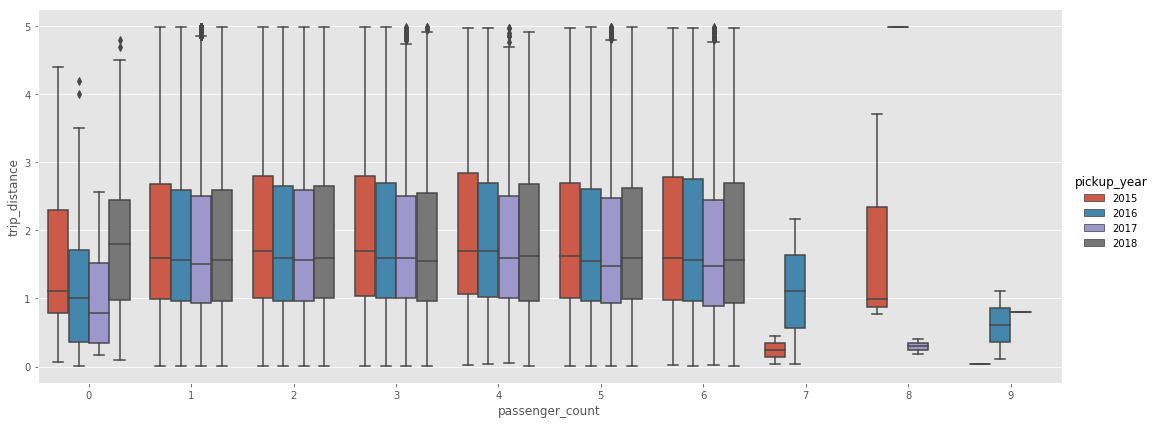

In [124]:
sns.catplot(data=green[(green['trip_distance']<5)&(green['trip_distance']>0)], x='passenger_count',
               y='trip_distance',hue='pickup_year',kind='box',height=6,aspect=2.5)

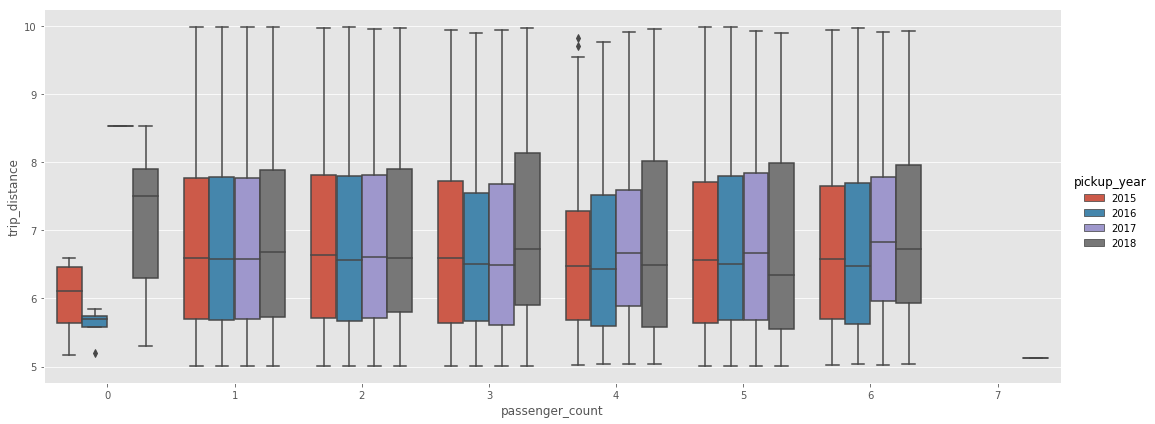

In [125]:
sns.catplot(data=green[(green.trip_distance<10)&(green.trip_distance>5)], x='passenger_count',
            y='trip_distance',hue='pickup_year',kind='box',height=6,aspect=2.5)

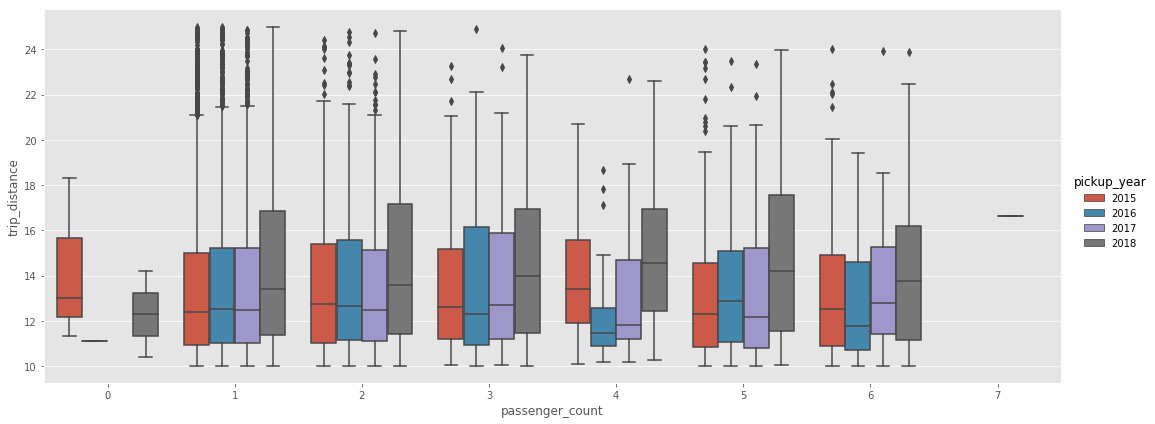

In [126]:
sns.catplot(data=green[(green.trip_distance<25)&(green.trip_distance>10)], x='passenger_count',
            y='trip_distance',hue='pickup_year',kind='box',height=6,aspect=2.5)

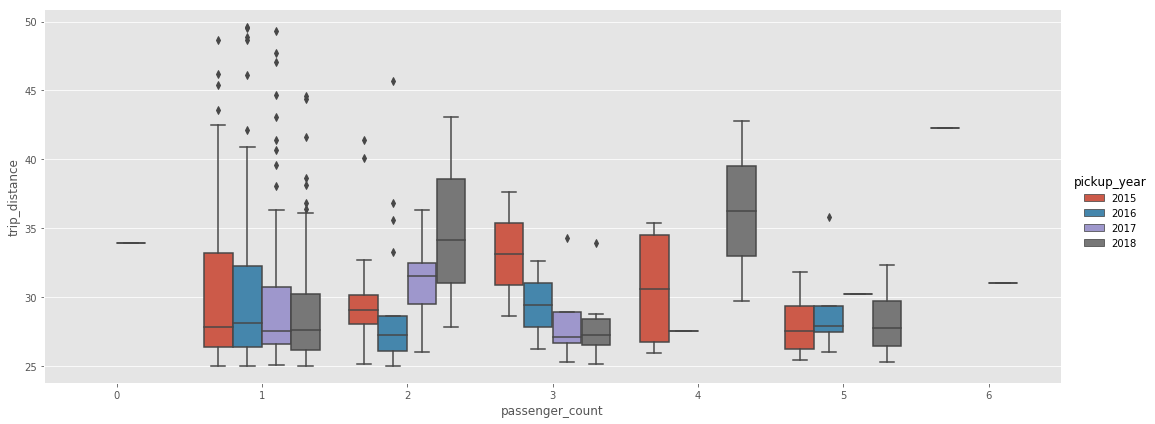

In [127]:
sns.catplot(data=green[(green.trip_distance<50)&(green.trip_distance>25)], x='passenger_count',
            y='trip_distance',hue='pickup_year',kind='box',height=6,aspect=2.5)

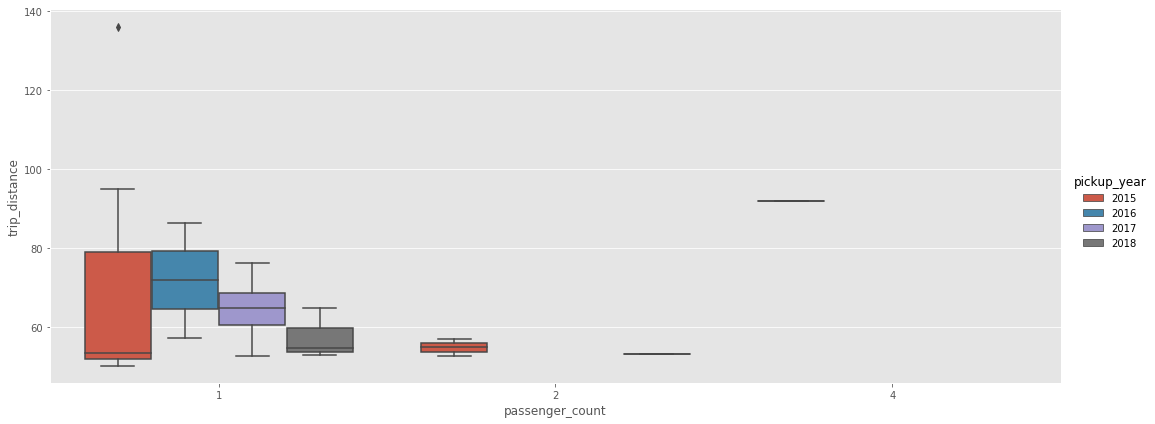

In [128]:
sns.catplot(data=green[(green.trip_distance>50)], x='passenger_count',y='trip_distance',
            hue='pickup_year',kind='box',height=6,aspect=2.5)

### Fare amount

In [59]:
print('There are {} records with negative total_amount which should be excluded from fare analysis.'.format(green[green['total_amount']<0].shape[0]))

There are 1130 records with negative total_amount which should be excluded from fare analysis.


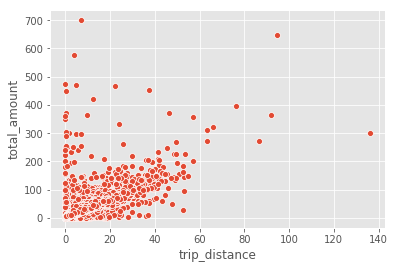

In [60]:
sns.scatterplot(x = 'trip_distance', y = 'total_amount', data = green[(green.trip_distance>0)&(green.total_amount>0)])

#### check total_amount vs trip_distance piece by piece
* 1 - 2, 2 - 3, 3 - 4, 4 - 5, 5 - 10, 10 - 15, 15 - 20, 20 - 25, 25 - 30, 30 - 35, 35 - 40, 40 - 45, 45 +
* many outliers for less than 1 mile
* over 30 miles, no obvious linear relation

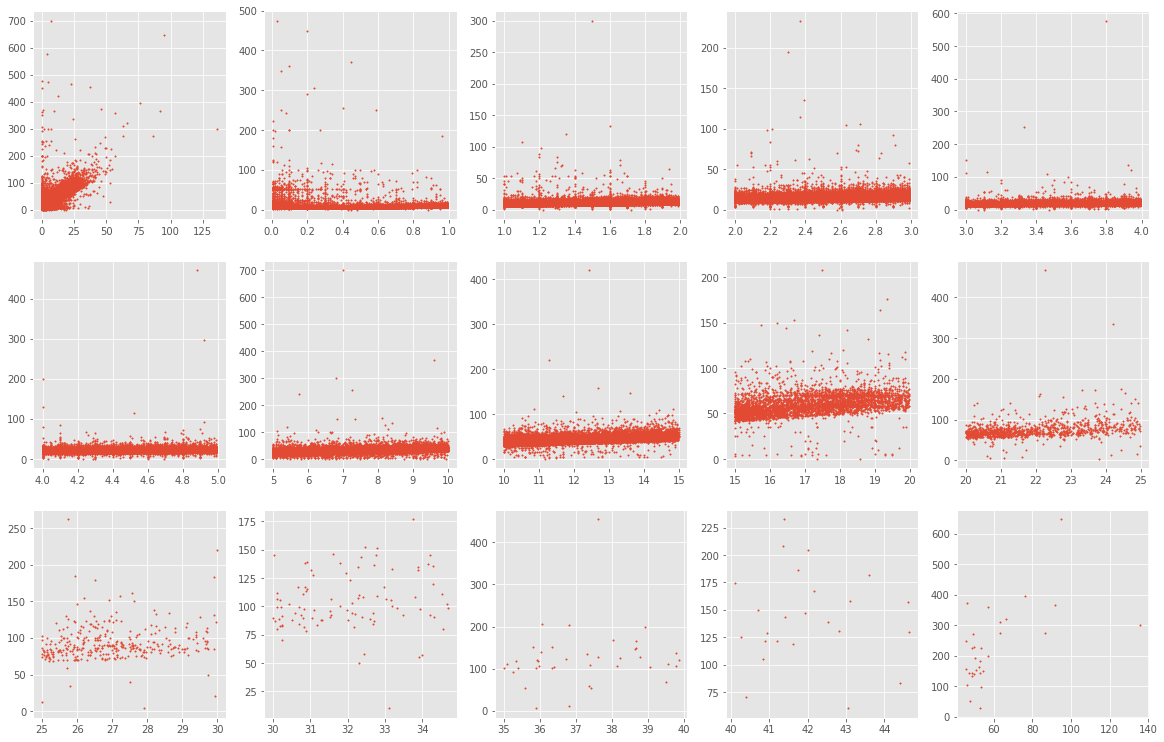

In [61]:
fig, ax = plt.subplots(3, 5,figsize=(20,13))
ax[0,0].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance>0)&(green.total_amount>0)],s=2)
ax[0,1].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance<1)&(green.trip_distance>0)&(green.total_amount>0)],s=2)
ax[0,2].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance<2)&(green.trip_distance>=1)&(green.total_amount>0)],s=2)
ax[0,3].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance<3)&(green.trip_distance>=2)&(green.total_amount>0)],s=2)
ax[0,4].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance<4)&(green.trip_distance>=3)&(green.total_amount>0)],s=2)
ax[1,0].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance<5)&(green.trip_distance>=4)&(green.total_amount>0)],s=2)
ax[1,1].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance<10)&(green.trip_distance>=5)&(green.total_amount>0)],s=2)
ax[1,2].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance<15)&(green.trip_distance>=10)&(green.total_amount>0)],s=2)
ax[1,3].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distancea<20)&(green.trip_distance>=15)&(green.total_amount>0)],s=2)
ax[1,4].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance<25)&(green.trip_distance>=20)&(green.total_amount>0)],s=2)
ax[2,0].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance<30)&(green.trip_distance>=25)&(green.total_amount>0)],s=2)
ax[2,1].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance<35)&(green.trip_distance>=30)&(green.total_amount>0)],s=2)
ax[2,2].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance<40)&(green.trip_distance>=35)&(green.total_amount>0)],s=2)
ax[2,3].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance<45)&(green.trip_distance>=40)&(green.total_amount>0)],s=2)
ax[2,4].scatter(x = 'trip_distance', y = 'total_amount', 
                data = green[(green.trip_distance>=45)&(green.total_amount>0)],s=2)

In [135]:
# sns.boxplot(x = 'passenger_count', y = 'total_amount', data = green[green['total_amount']>0])

In [133]:
# green[green['total_amount']>1000] # wrong inputs, should be removed?

In [134]:
# green[(green['total_amount']>500)&(green['total_amount']<1000)] 

In [65]:
# green[green['trip_distance']==0]

### Modify dataset ```fhv```

In [73]:
fhv['pickup_time'] = pd.to_datetime(fhv['pickup_time'])

In [74]:
fhv['dropoff_time'] = pd.to_datetime(fhv['dropoff_time'])

In [75]:
fhv['pickup_year'] = fhv.pickup_time.apply(lambda x: x.year)
fhv['pickup_month'] = fhv.pickup_time.apply(lambda x: x.month)
fhv['pickup_day'] = fhv.pickup_time.apply(lambda x: x.day)
fhv['pickup_day_of_week'] = fhv.pickup_time.apply(lambda x: x.weekday()+1) # why do i need to add one day
fhv['pickup_hour'] = fhv.pickup_time.apply(lambda x: x.hour)
fhv['pickup_date'] = fhv['pickup_time'].apply(lambda x: x.date())

In [76]:
fhv['dropoff_year'] = fhv.dropoff_time.apply(lambda x: x.year)
fhv['dropoff_month'] = fhv.dropoff_time.apply(lambda x: x.month)
fhv['dropoff_day'] = fhv.dropoff_time.apply(lambda x: x.day)
fhv['dropoff_day_of_week'] = fhv.dropoff_time.apply(lambda x: x.weekday()+1) # why do i need to add one day
fhv['dropoff_hour'] = fhv.dropoff_time.apply(lambda x: x.hour)
fhv['dropoff_date'] = fhv['dropoff_time'].apply(lambda x: x.date())

### Histogram of fhv pickups

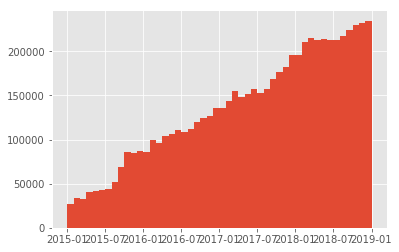

In [78]:
fhv['pickup_time'].hist(bins=48)
display()

#### by different companies

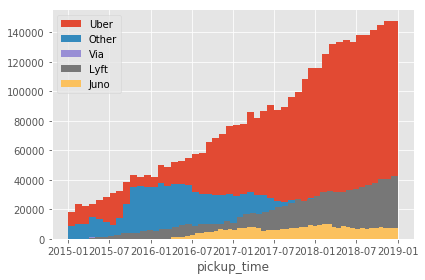

In [131]:
ff = sns.FacetGrid(fhv,hue = 'company',height=4,aspect=1.5)
ff.map(plt.hist,'pickup_time',bins=48)
plt.legend()

#### by month

In [80]:
fhvByMonth = fhv.groupby(['company','pickup_year','pickup_month']).agg({'pickup_time':'count'}).reset_index()
fhvByMonth.columns = ['company','pickup_year','pickup_month','count']

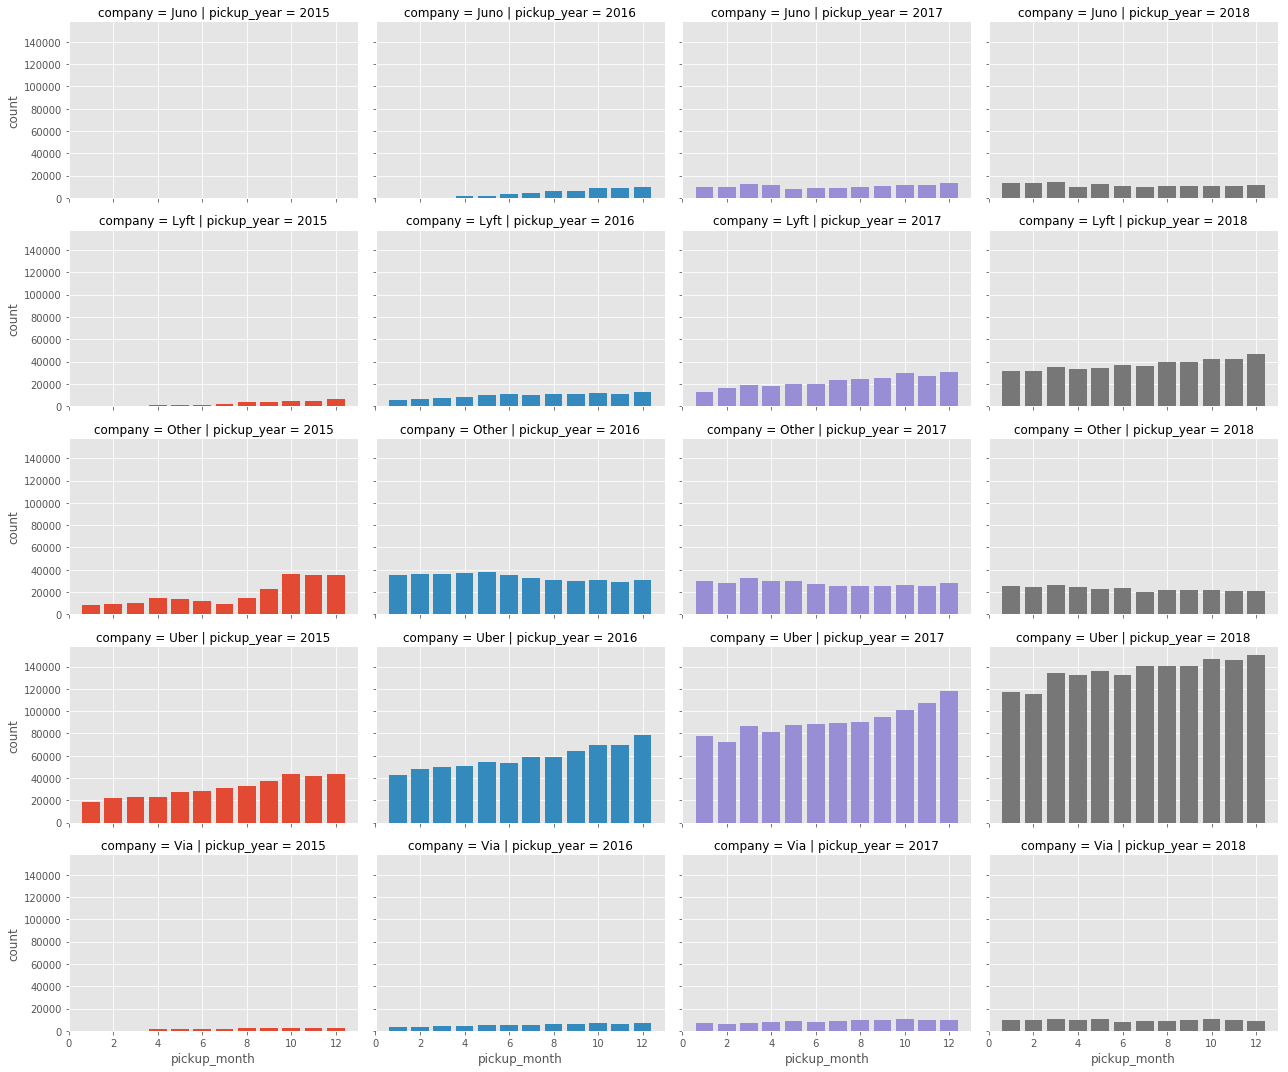

In [81]:
f = sns.FacetGrid(fhvByMonth, col='pickup_year',row='company',hue='pickup_year',aspect=1.5)
f.map(plt.bar,'pickup_month','count')

#### by day of a month

In [82]:
fhvByDay = fhv.groupby(['company','pickup_year','pickup_day']).agg({'pickup_time':'count'}).reset_index()
fhvByDay.columns = ['company','pickup_year','pickup_day','count']

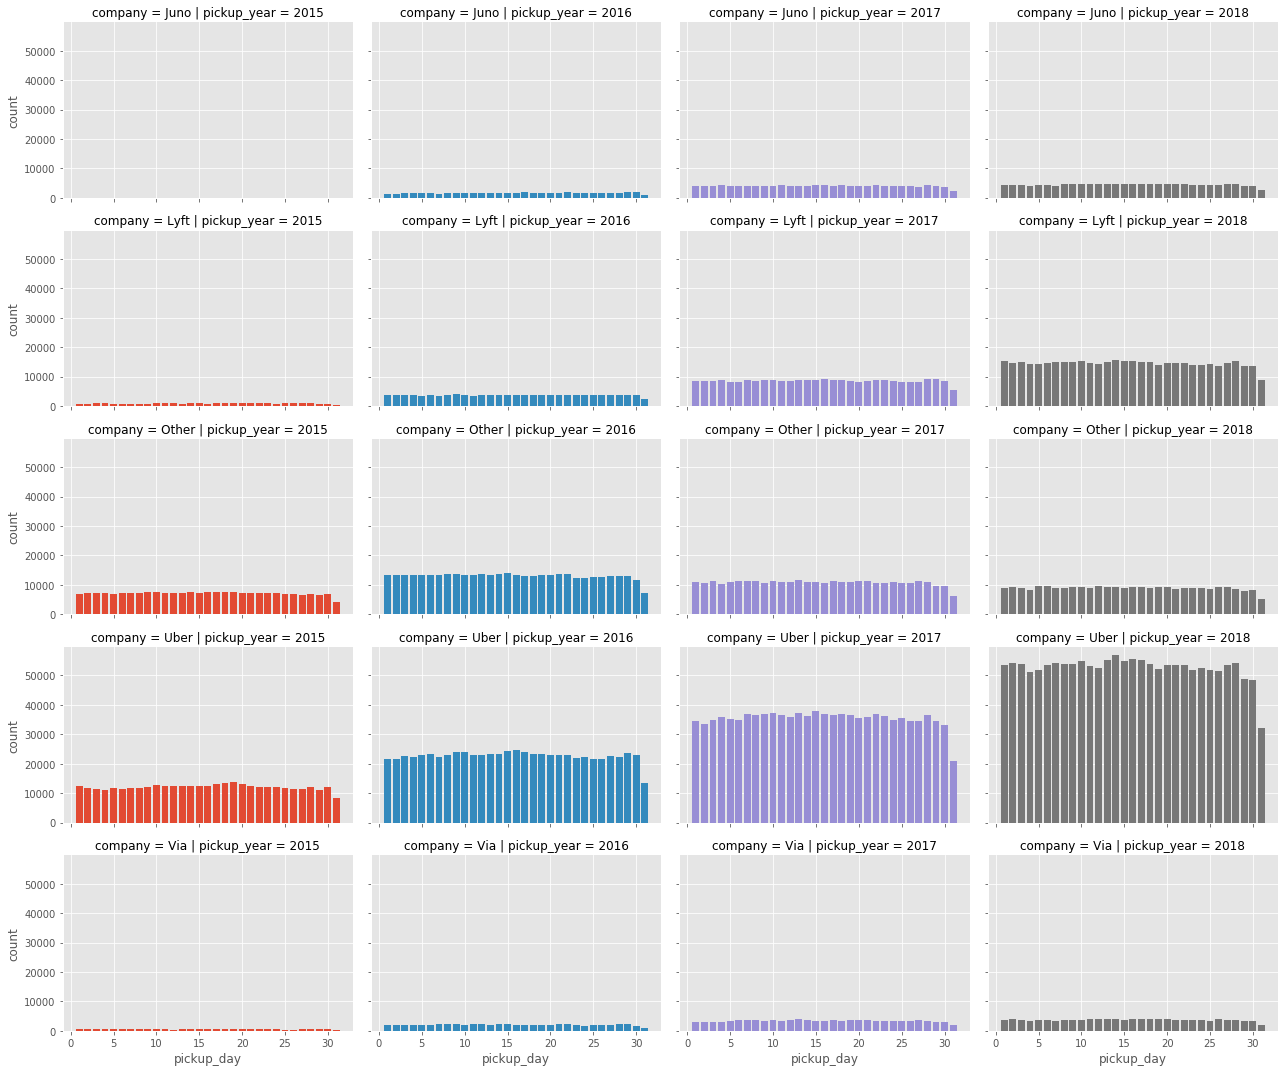

In [83]:
f1 = sns.FacetGrid(fhvByDay, col='pickup_year',row='company',hue='pickup_year',aspect=1.5)
f1.map(plt.bar,'pickup_day','count')

#### by day of a week

In [84]:
fhvByDayOfWeek = fhv.groupby(['company','pickup_year','pickup_day_of_week']).agg({'pickup_time':'count'}).reset_index()
fhvByDayOfWeek.columns = ['company','pickup_year','pickup_day_of_week','count']

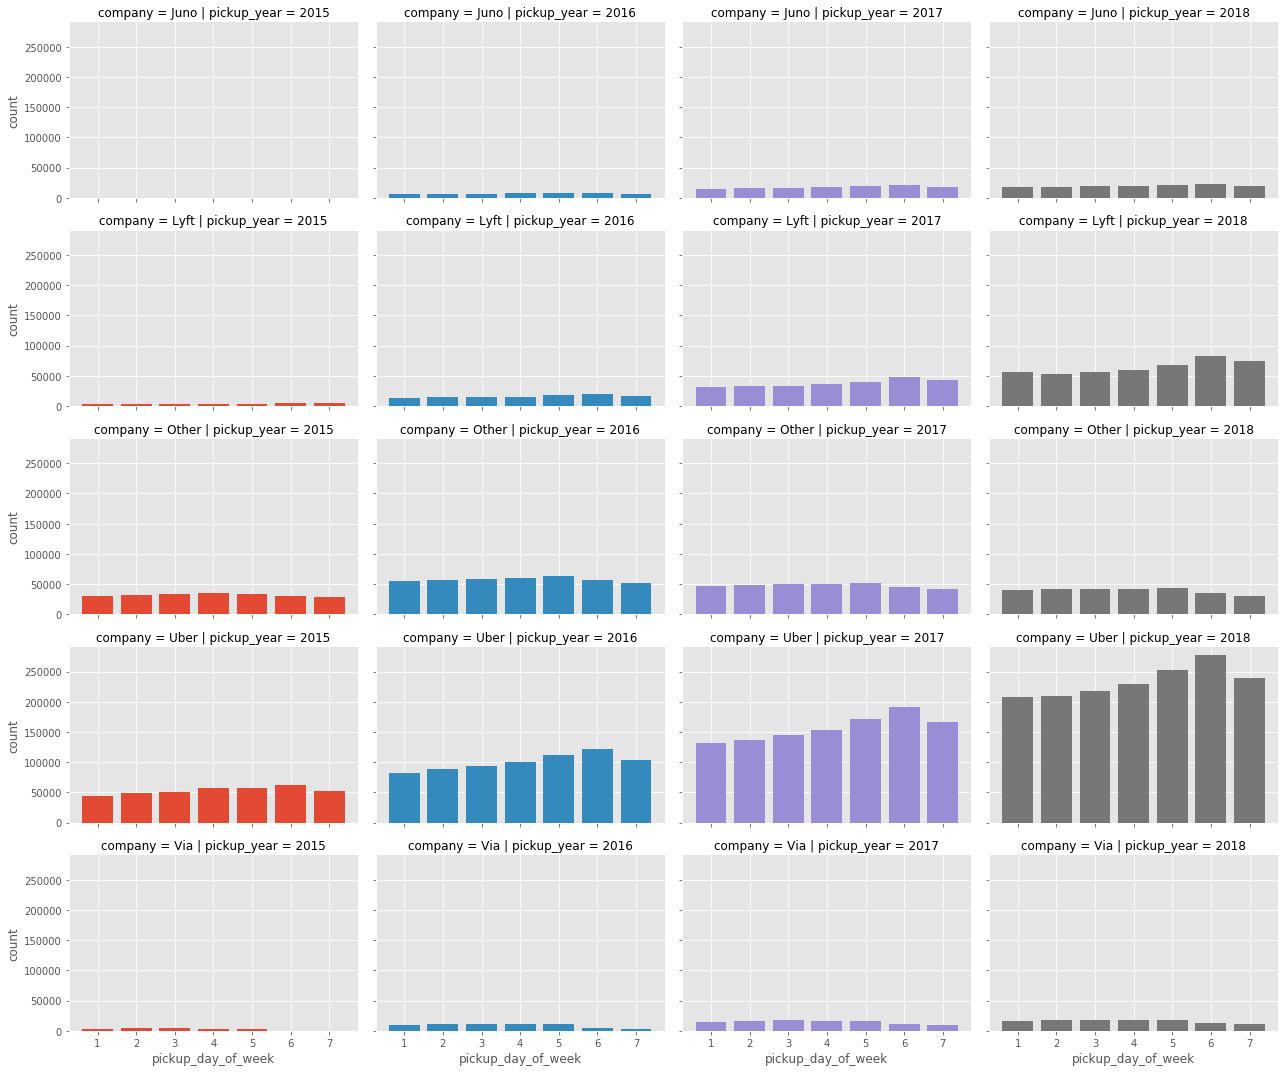

In [85]:
f2 = sns.FacetGrid(fhvByDayOfWeek, col='pickup_year',row='company',hue='pickup_year',aspect=1.5)
f2.map(plt.bar,'pickup_day_of_week','count')

### Pickup Locations

In [87]:
# byploc = fhv.groupby(['pickup_year','pickup_month','pickup_loc']).agg({'pickup_time':'count'}).reset_index()
byploc = fhv.groupby(['pickup_year','pickup_loc']).agg({'pickup_time':'count'}).reset_index()

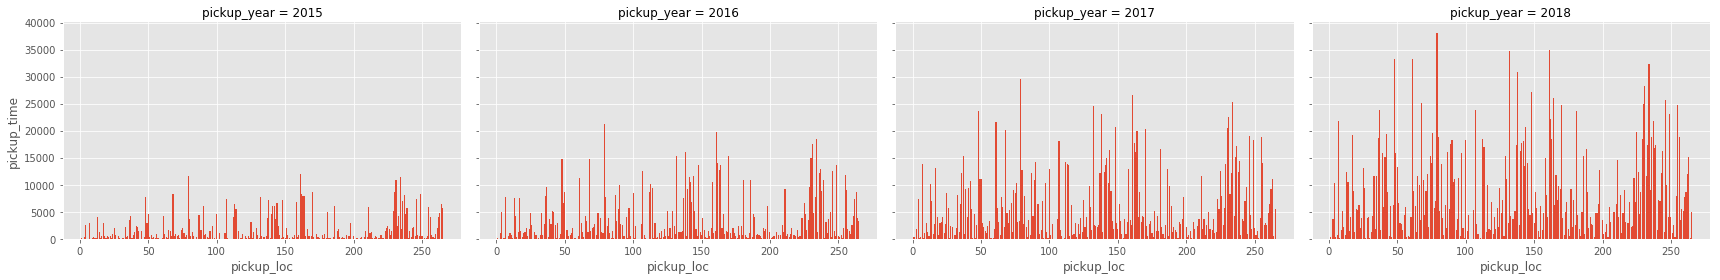

In [132]:
# ploc = sns.FacetGrid(byploc[byploc.pickup_loc!=0],col='pickup_year',row='pickup_month',size=4,aspect=1.5)
ploc = sns.FacetGrid(byploc[byploc.pickup_loc!=0],col='pickup_year',height=4,aspect=1.5)
ploc.map(plt.bar,'pickup_loc','pickup_time')

In [89]:
pl=byploc[byploc.pickup_loc!=0]

In [95]:
dic2015 = dict(zip(pl[pl.pickup_year==2015].pickup_loc,pl[pl.pickup_year==2015].pickup_time))
dic2016 = dict(zip(pl[pl.pickup_year==2015].pickup_loc,pl[pl.pickup_year==2016].pickup_time))
dic2017 = dict(zip(pl[pl.pickup_year==2015].pickup_loc,pl[pl.pickup_year==2017].pickup_time))
dic2018 = dict(zip(pl[pl.pickup_year==2015].pickup_loc,pl[pl.pickup_year==2018].pickup_time))

In [97]:
for i in range(1,266):
    if i in dic2015.keys():
        pass
    else:
        dic2015[i] = 0
    if i in dic2016.keys():
        pass
    else:
        dic2016[i] = 0
    if i in dic2017.keys():
        pass
    else:
        dic2017[i] = 0
    if i in dic2018.keys():
        pass
    else:
        dic2018[i] = 0

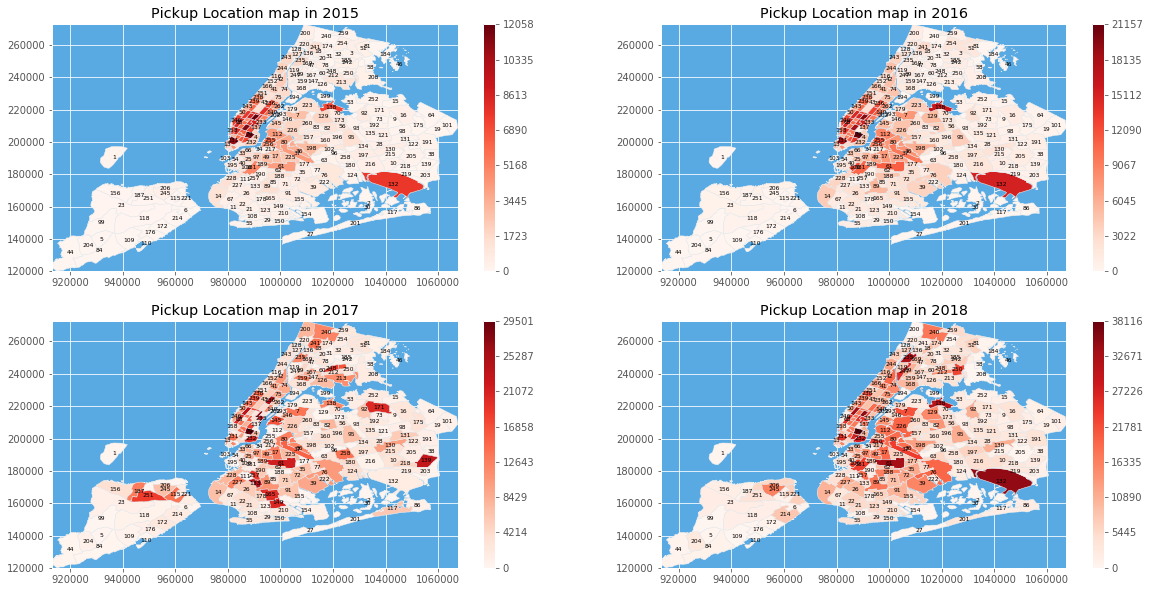

In [99]:
from zone import *

df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf).set_index("LocationID"), on="LocationID")

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = plt.subplot(2, 2, 1)
ax.set_title("Pickup Location map in 2015")
draw_zone_map(ax, sf, dic2015)

ax = plt.subplot(2, 2, 2)
ax.set_title("Pickup Location map in 2016")
draw_zone_map(ax, sf, dic2016)

ax = plt.subplot(2, 2, 3)
ax.set_title("Pickup Location map in 2017")
draw_zone_map(ax, sf, dic2017)

ax = plt.subplot(2, 2, 4)
ax.set_title("Pickup Location map in 2018")
draw_zone_map(ax, sf, dic2018)

##### Map Reference: https://chih-ling-hsu.github.io/2018/05/14/NYC

### Need to finish : comparison among all three .csv files